In [32]:
from eye_contact_frames import eye_contact_frames 
import pandas as pd

from sklearn.metrics import accuracy_score

In [21]:
list_annotated = eye_contact_frames("annotations/annotations_5.xml", 6378)

1925


In [37]:
list_annotated
from collections import Counter

print(Counter(list_annotated).keys()) # equals to list(set(words))
Counter(list_annotated).values() # counts the elements' frequency

dict_keys([1.0, 0.0])


dict_values([1925, 4453])

In [40]:
df_annotated = pd.DataFrame(list_annotated, columns= ["annotated"])
df_annotated

,annotated
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6373,1.0
6374,1.0
6375,1.0
6376,1.0


In [23]:
df = pd.read_csv("video_annot5_output.txt", names = ["frame", "acc"])

In [30]:
df["rounded"] = pd.Series([x>.7 for x in df.acc])
df[df.rounded]

df.replace({True : 1, False : 0}, inplace=True)

In [31]:
df

,frame,acc,rounded
0,2,0.261932,0
1,12,0.234186,0
2,13,0.266573,0
3,15,0.206249,0
4,16,0.213829,0
...,...,...,...
2762,4025,0.563366,0
2763,4026,0.594875,0
2764,4026,0.012109,0
2765,4027,0.008396,0


In [6]:
# bestimme accuracy von list_annotated und df
# dafür nur eine spalte von df nötig und dann 
# von sklearn die accuracy funktion


# vorher df runden!

In [ ]:
accuracy_score()

# merge annotated and real

In [51]:
merged = pd.merge(df, df_annotated, left_on = "frame", right_index=True)
merged

,frame,acc,rounded,annotated
0,2,0.261932,0,1.0
1,12,0.234186,0,1.0
2,13,0.266573,0,1.0
3,15,0.206249,0,1.0
4,16,0.213829,0,1.0
...,...,...,...,...
2762,4025,0.563366,0,0.0
2763,4026,0.594875,0,0.0
2764,4026,0.012109,0,0.0
2765,4027,0.008396,0,0.0


In [52]:
accuracy_score(merged.annotated, merged.rounded)

0.5952294904228406

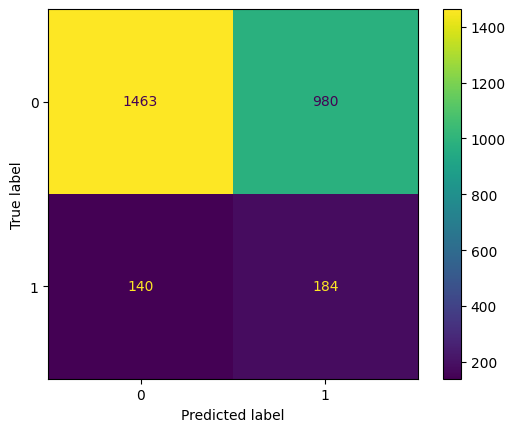

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay(confusion_matrix(merged.rounded, merged.annotated)).plot();

0.5 0.5388507408745934
0.55 0.5543910372244308
0.6000000000000001 0.5746295627032888
0.6500000000000001 0.5876400433682689
0.7000000000000002 0.5952294904228406
0.7500000000000002 0.6042645464401879
0.8000000000000003 0.6064329598843513
0.8500000000000003 0.6064329598843513
0.9000000000000004 0.597397903867004
0.9500000000000004 0.5865558366461872


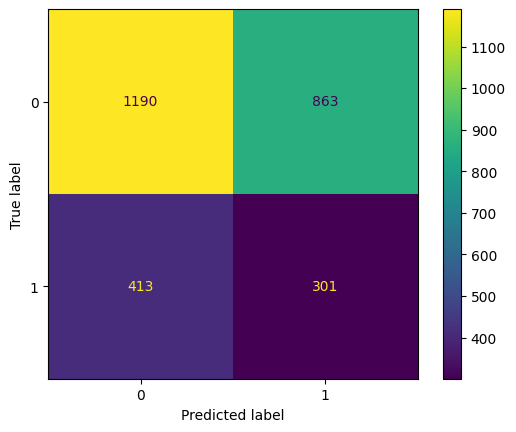

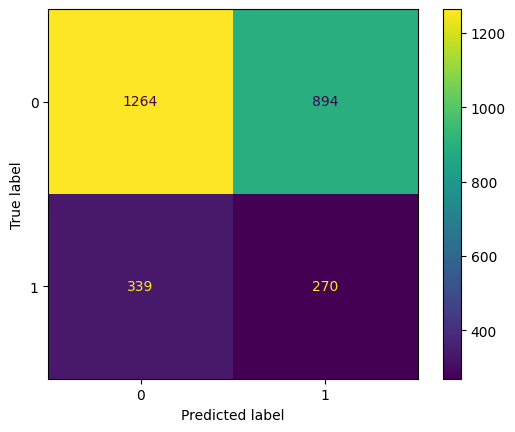

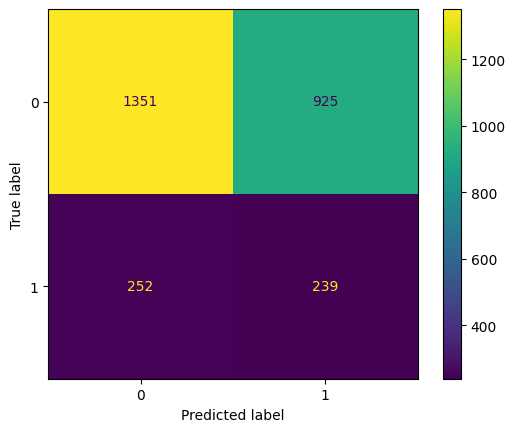

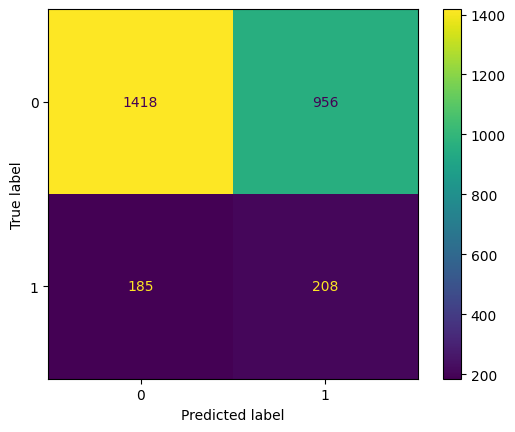

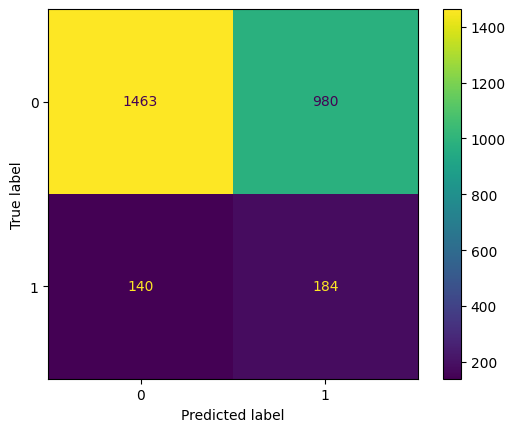

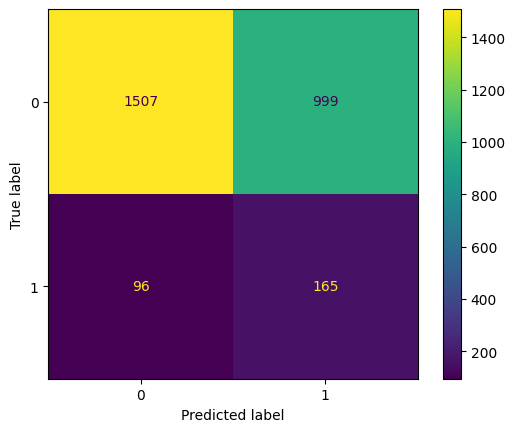

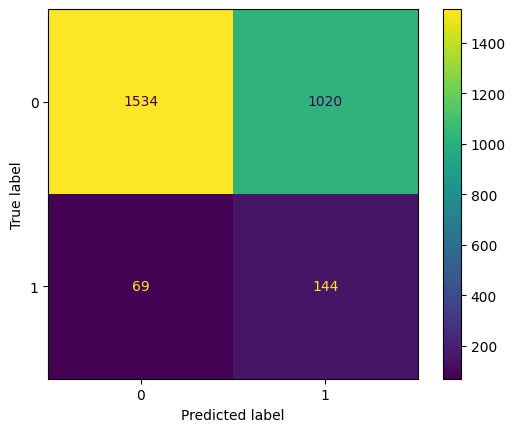

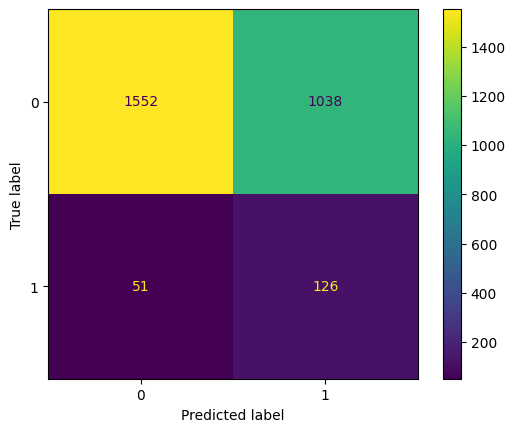

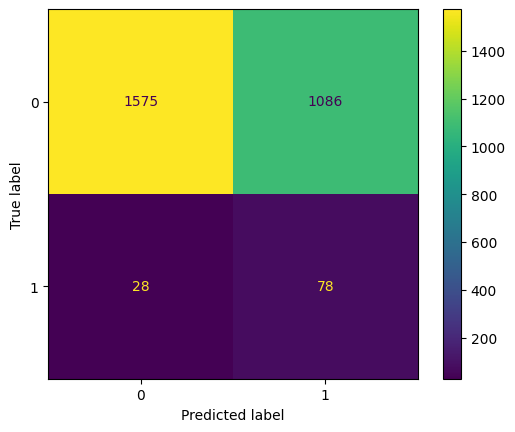

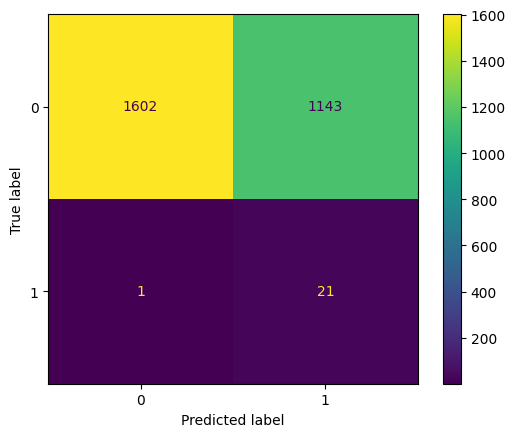

In [73]:
def view(threshold, annotations, real):
    real_rounded = [x>threshold for x in real]
    print(threshold, accuracy_score(real_rounded, annotations))
    ConfusionMatrixDisplay(confusion_matrix(real_rounded, annotations)).plot();
import numpy as np
for threshold in np.arange(.5, 1, .05):
    view(threshold, merged.annotated, merged.acc)

In [68]:
import numpy as np
for threshold in np.arange(.5, 1, .05):
    print(threshold)

0.5
0.55
0.6000000000000001
0.6500000000000001
0.7000000000000002
0.7500000000000002
0.8000000000000003
0.8500000000000003
0.9000000000000004
0.9500000000000004
